# Airport

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

COLS = [
    "Airport",
    "City",
    "Scheduled departures",
    "Performed departures",
    "Enplaned passengers",
    "Enplaned revenue tons of freight",
    "Enplaned revenue tons of mail"
]

def read_airport_file(path: str) -> pd.DataFrame:
    rows = []
    with open(path, encoding="utf-8") as f:
        for raw in f:
            raw = raw.rstrip("\n")
            if not raw.strip():
                continue

            raw = raw.expandtabs(2)          # табы → ≥2 пробелов
            left, *nums = raw.rsplit(None, 5)

            airport, city = left.rsplit(" ", 1)

            rows.append([airport, city] + nums)

    df = pd.DataFrame(rows, columns=COLS)

    # приводим числовые столбцы к нужному типу
    df[COLS[2:]] = df[COLS[2:]].apply(pd.to_numeric)

    # убираем пробелы по краям строковых столбцов
    df["Airport"] = df["Airport"].str.strip()
    df["City"] = df["City"].str.strip()

    return df


df = read_airport_file("airportdat.txt")
df.head()


,Airport,City,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
0,HARTSFIELD INTL,ATLANTA,285693,288803,22665665,165668.76,93039.48
1,BALTO/WASH INTL,BALTIMORE,73300,74048,4420425,18041.52,19722.93
2,LOGAN INTL,BOSTON,114153,115524,9549585,127815.09,29785.72
3,DOUGLAS MUNI,CHARLOTTE,120210,121798,7076954,36242.84,15399.46
4,OHARE INTL,CHICAGO,322430,332338,25636383,300463.80,140359.38


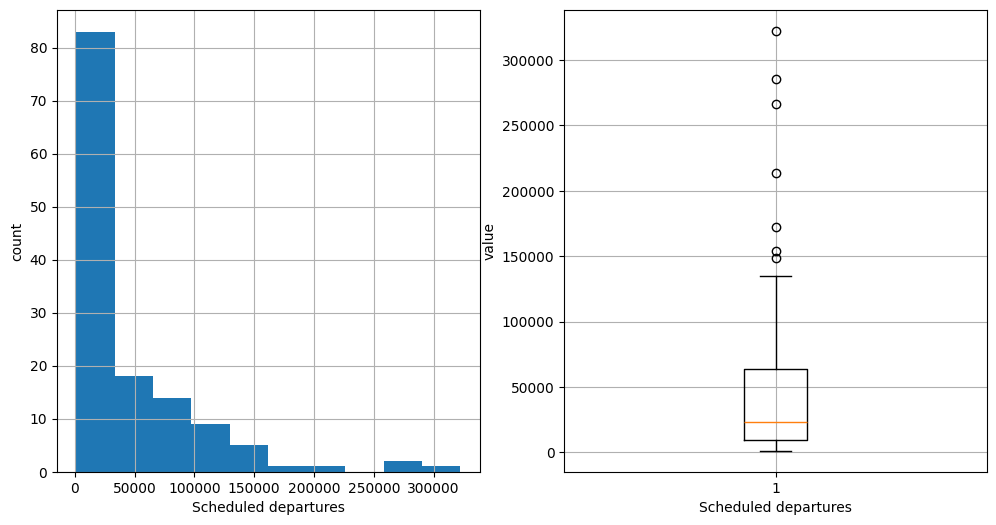

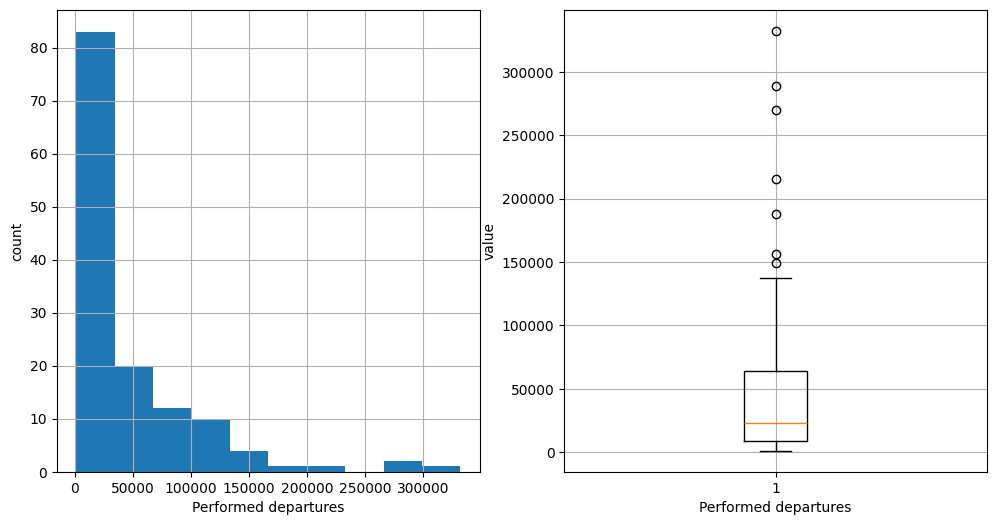

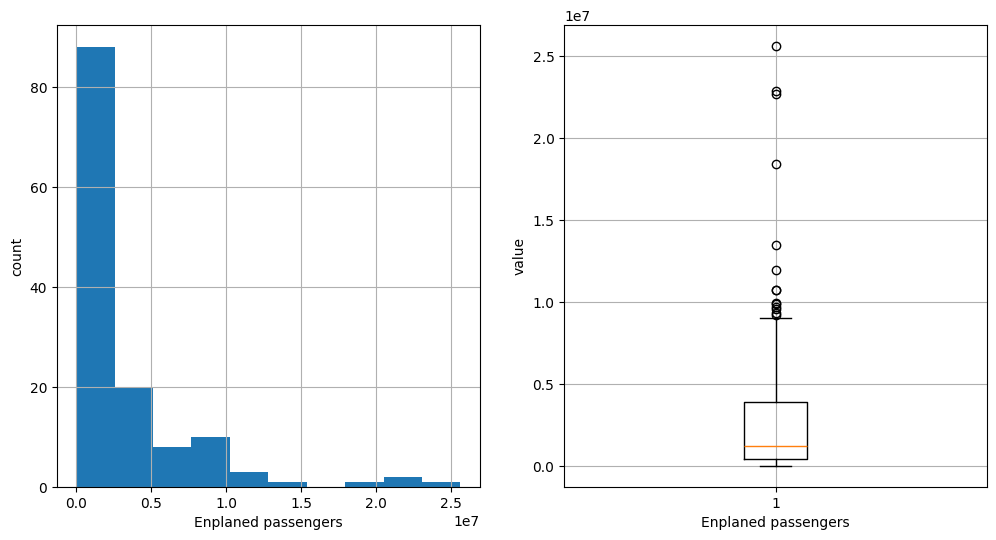

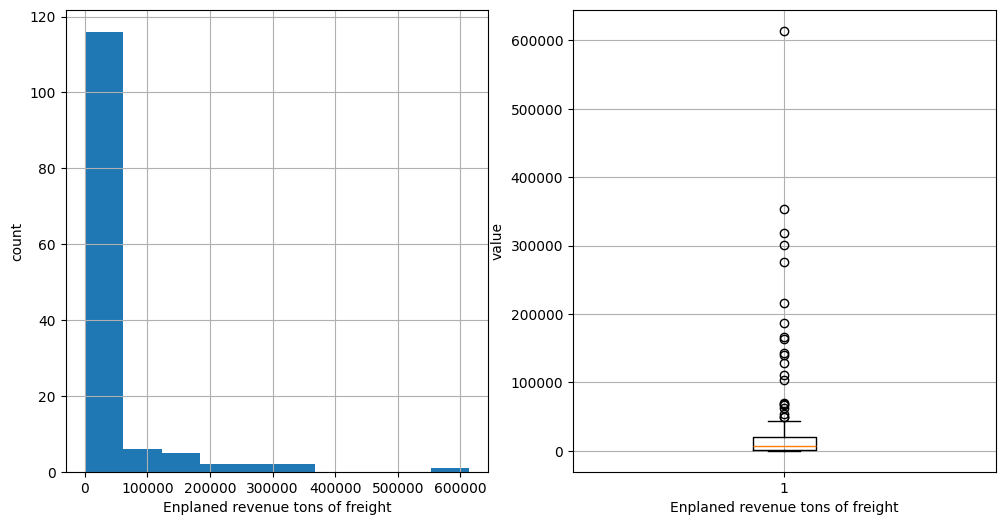

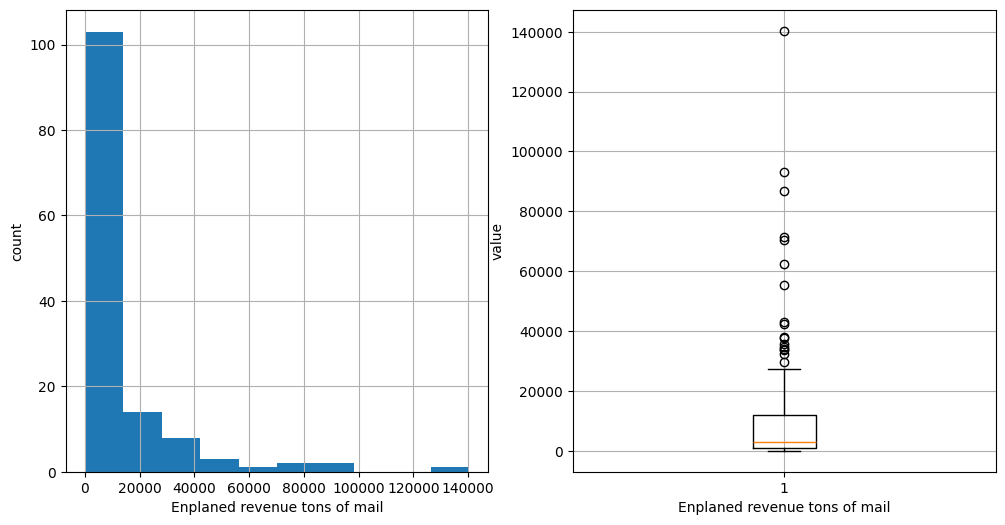

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in COLS[2:]:
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].hist(df[col])
    ax[1].boxplot(df[col])

    ax[0].set_xlabel(col)
    ax[0].set_ylabel('count')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('value')

    ax[0].grid()
    ax[1].grid()
    plt.show()

Предположение о виде распределения: логнормальное у всех переменных <p>
Ящий с усами показывает, что у каждой переменной есть выбивающиеся значения, но можно сделать предположение, что эти значения - крупные аэропорты, у которых все показатели значительно выше основной массы аэропортов

In [8]:
stats_list = ['col_name', 'mean', 'var', 'std', 'median', '1st quart', '3rd quart']
descr_dict = {k: [] for k in stats_list}

for col in COLS[2:]:
    descr_dict['col_name'].append(col)
    descr_dict['mean'].append(df[col].mean())
    descr_dict['var'].append(df[col].std() ** 2)
    descr_dict['std'].append(df[col].std())
    descr_dict['median'].append(df[col].median())
    descr_dict['1st quart'].append(df[col].quantile(0.25))
    descr_dict['3rd quart'].append(df[col].quantile(0.75))

In [ ]:
!pip install prettytable

In [11]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = descr_dict.keys()

for row in zip(*descr_dict.values()):
    table.add_row(row)

print(table)

+----------------------------------+--------------------+--------------------+--------------------+-----------+-----------+--------------------+
|             col_name             |        mean        |        var         |        std         |   median  | 1st quart |     3rd quart      |
+----------------------------------+--------------------+--------------------+--------------------+-----------+-----------+--------------------+
|       Scheduled departures       | 45562.42537313433  | 3202940994.0056653 | 56594.53148499125  |  22864.5  |   9049.0  |      63643.75      |
|       Performed departures       | 46304.96268656717  | 3331108570.3068666 | 57715.756690065726 |  23027.5  |   9195.0  |      64196.75      |
|       Enplaned passengers        | 3136191.925373134  | 21202724262073.75  | 4604641.5997419115 | 1210722.0 | 424246.75 |     3865530.25     |
| Enplaned revenue tons of freight | 33858.15768656716  | 6575904728.799894  | 81091.95230600811  |  6195.27  |  1540.135 |     20

# Babyboom

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import pandas as pd

COLS = ["Time", "Sex", "Birth Weight (g)", "Minutes Since Midnight"]

def read_babyboom_file(path: str) -> pd.DataFrame:
    rows = []
    with open(path, encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            # Разделяем строку по пробелам (учитывая произвольное количество пробелов)
            parts = line.split()
            if len(parts) != 4:
                continue  # на случай испорченной строки
            time, sex, weight, minutes = parts
            rows.append([time, int(sex), int(weight), int(minutes)])

    return pd.DataFrame(rows, columns=COLS)

df = read_babyboom_file("babyboom.dat.txt")
df.head()

,Time,Sex,Birth Weight (g),Minutes Since Midnight
0,0005,1,3837,5
1,0104,1,3334,64
2,0118,2,3554,78
3,0155,2,3838,115
4,0257,2,3625,177


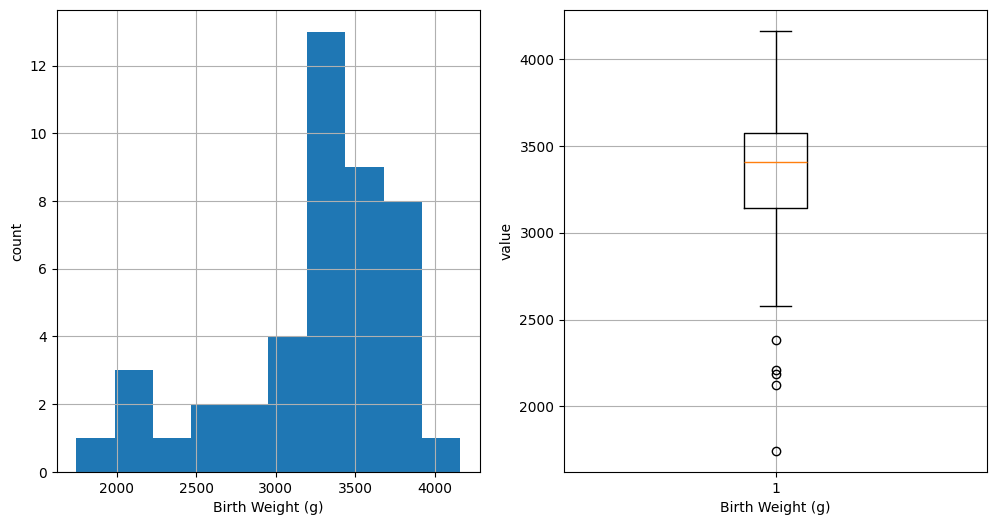

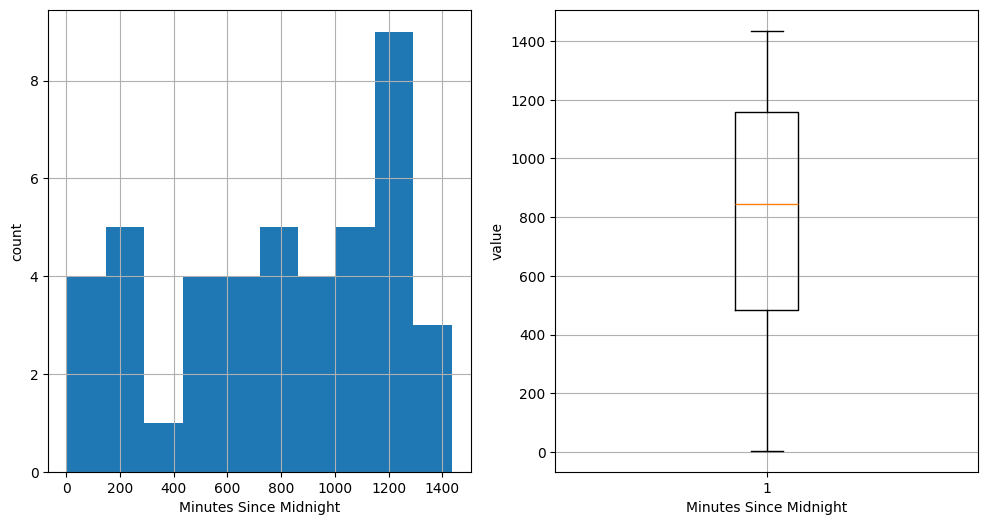

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in COLS[2:]:
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].hist(df[col])
    ax[1].boxplot(df[col])

    ax[0].set_xlabel(col)
    ax[0].set_ylabel('count')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('value')

    ax[0].grid()
    ax[1].grid()
    plt.show()

Вес ребенка распределен по skew-normal распределению, а минуты подчиняются своему какому то закону (в какой то из времени суток чаще рождаются, в какой то реже) <p>
Ящик с усами говорит, что либо выборка была не однородной и мальчиков было больше (они весят больше), а девочки выбились из выборки, либо показывает, что были недоношенные дети

In [17]:
stats_list = ['col_name', 'mean', 'var', 'std', 'median', '1st quart', '3rd quart']
descr_dict = {k: [] for k in stats_list}

for col in COLS[2:]:
    descr_dict['col_name'].append(col)
    descr_dict['mean'].append(df[col].mean())
    descr_dict['var'].append(df[col].std() ** 2)
    descr_dict['std'].append(df[col].std())
    descr_dict['median'].append(df[col].median())
    descr_dict['1st quart'].append(df[col].quantile(0.25))
    descr_dict['3rd quart'].append(df[col].quantile(0.75))

In [18]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = descr_dict.keys()

for row in zip(*descr_dict.values()):
    table.add_row(row)

print(table)

+------------------------+--------------------+--------------------+--------------------+--------+-----------+-----------+
|        col_name        |        mean        |        var         |        std         | median | 1st quart | 3rd quart |
+------------------------+--------------------+--------------------+--------------------+--------+-----------+-----------+
|    Birth Weight (g)    | 3275.9545454545455 | 278818.27695560246 |  528.032458240592  | 3404.0 |   3141.5  |  3571.75  |
| Minutes Since Midnight | 788.7272727272727  | 173111.69133192397 | 416.06693131264825 | 846.5  |   482.75  |   1158.5  |
+------------------------+--------------------+--------------------+--------------------+--------+-----------+-----------+
